In [1442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and exploring

In [1443]:
movies = pd.read_csv('IMDB_dataset.csv', encoding='utf-16', encoding_errors='ignore', delimiter=";")
movies.head()

,IMBD title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


In [1444]:
movies[movies.duplicated()].count() #no duplicates

IMBD title ID     0
Original title    0
Release year      0
Genre             0
Duration          0
Country           0
Content Rating    0
Director          0
Unnamed: 8        0
Income            0
Votes             0
Score             0
dtype: int64

In [1445]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMBD title ID   100 non-null    object 
 1   Original title  100 non-null    object 
 2   Release year    100 non-null    object 
 3   Genre           100 non-null    object 
 4   Duration        99 non-null     object 
 5   Country         100 non-null    object 
 6   Content Rating  77 non-null     object 
 7   Director        100 non-null    object 
 8   Unnamed: 8      0 non-null      float64
 9   Income          100 non-null    object 
 10  Votes           100 non-null    object 
 11  Score           100 non-null    object 
dtypes: float64(1), object(11)
memory usage: 9.6+ KB


## Data cleaning

In [1446]:
movies.drop(columns=['Unnamed: 8'], inplace=True) #drop empty column
movies.dropna(subset=["IMBD title ID"], inplace=True) #drop missing movies
movies = movies.rename(columns={"IMBD title ID": "IMDB title ID"}) #rename the column
movies.head()

,IMDB title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"


### "Release year" column

In [1447]:
movies["Release year"].unique()   #look at the values

array(['1995-02-10', '09 21 1972', ' 23 -07-2008', '1975-09-25',
       '1994-10-28', '22 Feb 04', '1994-03-11', '1957-09-04',
       '2010-09-24', '10-29-99', '1994-10-06', '2002-01-18',
       '23rd December of 1966 ', '1999-05-07', '01/16-03', '1980-09-19',
       '1990-09-20', '18/11/1976', '2014-11-06', '1995-12-15',
       '1991-03-05', '1977-10-20', '1998-10-30', '2000-10-03',
       '2003-05-09', '2003-04-18', '1997-12-20', '2019-11-07',
       '1948-03-11', '1955-08-19', '2000-05-19', '2006-10-27',
       '2006-12-22', '1985-10-18', '1999-08-27', '1995-04-07',
       '1991-12-19', '1995-11-30', '1994-11-25', '2019-10-03',
       '2012-02-24', '2002-10-25', '2015-02-12', '1960-10-28', '21-11-46',
       '1968-12-21', '2015-10-11', '1988-11-17', '1937-03-12',
       '2012-08-29', '2013-01-17', '2001-01-19', '2008-10-17',
       '1980-12-22', '1981-06-12', '2018-04-25', '1979-10-25',
       '2019-04-24', '1979-12-18', '2005-05-06', '1964-04-03',
       '1955-04-14', '2017-12-28',

In [1448]:
movies["Release year"] = movies["Release year"].str.strip().str.replace("/","-").str.replace(" ", "-").str.replace("--", "-").str.replace("23rd-December-of-1966", "1966-12-23").str.replace("The-6th-of-marzo,-year-1951", "1951-03-06").str.replace("Feb", "02") #clean the dates
def parse_mixed_dates(date_str): #try different formats on the dates
    formats = ["%Y-%m-%d", "%d-%m-%Y", "%m-%d-%Y"]
    
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue 
    
    return pd.NaT 
movies["Release year"] = movies["Release year"].apply(parse_mixed_dates)
mode = movies["Release year"].mode()[0]  #fill the missing values with the mode
movies["Release year"]=movies["Release year"].fillna(mode)
movies["Release year"].value_counts()
movies["Release year"] = pd.to_datetime(movies["Release year"]).dt.year #extract only the year
movies.head()

,IMDB title ID,Original title,Release year,Genre,Duration,Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994,"Crime, Drama",,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"


### "Genre" column

In [1449]:
movies["Genre"].unique() #look at the values

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Action, Adventure, Fantasy',
       'Biography, Crime, Drama', 'Adventure, Drama, Sci-Fi',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller', 'Drama, War',
       'Crime, Drama, Fantasy', 'Animation, Adventure, Family',
       'Comedy, Drama, Romance', 'Comedy, Drama, Thriller',
       'Drama, Family, Fantasy', 'Drama, Mystery, Sci-Fi',
       'Adventure, Comedy, Sci-Fi', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Biography, Comedy, Drama',
       'Biography, Drama, Music', 'Drama, Music',
       'Horror, Mystery, Thriller', 'Drama, Romance, War',
       'Animation, Drama, War', 'Comedy, Drama, Family',
       'Action, Adventure', 'Drama, Western', 'Mystery, Thriller',
       'Drama, Horror', 'Horror, Sci-Fi', 'Drama, Mystery, War',
       'Action,

In [1450]:
split_genre = movies['Genre'].str.split(',', expand=True) #split the column by comma

unique_values = pd.unique(split_genre.values.ravel()) #list of all values
unique_values = [val.strip() for val in unique_values if pd.notna(val)] #drop na values if any and strip the values

for val in unique_values:
    movies[val] = movies['Genre'].apply(lambda x: 1 if val in x else 0)  #create new columns for each unique value

movies.drop(columns=['Genre'], inplace=True) #drop the "Genre" column
movies.head()

,IMDB title ID,Original title,Release year,Duration,Country,Content Rating,Director,Income,Votes,Score,...,Mystery,Thriller,War,Animation,Family,Comedy,Music,Horror,Film-Noir,Musical
0,tt0111161,The Shawshank Redemption,1995,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3,...,0,0,0,0,0,0,0,0,0,0
1,tt0068646,The Godfather,1972,175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2,...,0,0,0,0,0,0,0,0,0,0
2,tt0468569,The Dark Knight,2008,152,US,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.,...,0,0,0,0,0,0,0,0,0,0
3,tt0071562,The Godfather: Part II,1975,220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0",...,0,0,0,0,0,0,0,0,0,0
4,tt0110912,Pulp Fiction,1994,,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f",...,0,0,0,0,0,0,0,0,0,0


### "Duration" column

In [1451]:
movies["Duration"].unique() #look at the values

array(['142', '175', '152', '220', ' ', '201', 'Nan', '96', '148', 'Inf',
       '178c', '161', nan, '179', 'Not Applicable', '146', '-', '169',
       '127', '118', '121', '189', '130', '125', '116', '132', '207',
       '155', '151', '119', '110', '137', '106', '88', '122', '112',
       '150', '109', '102', '165', '89', '87', '164', '113', '98', '115',
       '149', '117', '181', '147', '120', '95', '105', '170', '134',
       '229', '153', '178', '131', '99', '108', '81', '126', '104', '136',
       '103', '114', '160', '128', '228', '129', '123'], dtype=object)

In [1452]:
movies["Duration"] = movies["Duration"].str.strip(" c-InfNot Applicable") #strip the values
movies.loc[movies["Duration"].isin([""]), "Duration"] = np.nan #replace empty values with nan
movies["Duration"] = movies["Duration"].astype(float)
movies["Duration"]=movies["Duration"].fillna(movies["Duration"].mean().round(0))  #fill nan values with mean
movies["Duration"] = movies["Duration"].astype(int)
movies["Duration"].unique()

array([142, 175, 152, 220, 135, 201,  96, 148, 178, 161, 179, 146, 169,
       127, 118, 121, 189, 130, 125, 116, 132, 207, 155, 151, 119, 110,
       137, 106,  88, 122, 112, 150, 109, 102, 165,  89,  87, 164, 113,
        98, 115, 149, 117, 181, 147, 120,  95, 105, 170, 134, 229, 153,
       131,  99, 108,  81, 126, 104, 136, 103, 114, 160, 128, 228, 129,
       123])

### "Country" column

In [1453]:
movies["Country"].unique() #look at the values

array(['USA', 'US', 'New Zealand', 'UK', 'New Zesland', 'Italy',
       'New Zeland', 'US.', 'Brazil', 'Japan', 'Italy1', 'South Korea',
       'France', 'Germany', 'India', 'Denmark', 'West Germany', 'Iran'],
      dtype=object)

In [1454]:
movies.loc[movies["Country"].str.contains("US"), "Country"] = "USA"    #replace similar values 
movies.loc[movies["Country"].str.contains("Germany"), "Country"] = "Germany"
movies.loc[movies["Country"].str.contains("New Z"), "Country"] = "New Zealand"
movies.loc[movies["Country"].str.contains("Italy"), "Country"] = "Italy"
movies["Country"].unique()

array(['USA', 'New Zealand', 'UK', 'Italy', 'Brazil', 'Japan',
       'South Korea', 'France', 'Germany', 'India', 'Denmark', 'Iran'],
      dtype=object)

### "Content rating" column

In [1455]:
movies["Content Rating"].unique() #look at the values

array(['R', 'PG-13', 'Not Rated', 'Approved', 'PG', nan, 'Unrated', 'G'],
      dtype=object)

In [1456]:
movies["Content Rating"] = movies["Content Rating"].fillna("Not Rated") #fill na values with "Not Rated"
movies.loc[movies["Content Rating"].str.contains("Not Rated|Approved|Unrated"), "Content Rating"] = "Not Rated"  #replace these invalid categories with "Not rated"
movies["Content Rating"] = movies["Content Rating"].astype("category")  
movies["Content Rating"] = movies["Content Rating"].cat.set_categories(new_categories=["Not Rated", "G", "PG", "PG-13", "R"], ordered=True) #order categories
movies["Content Rating"].value_counts()

Content Rating
R            45
Not Rated    26
PG-13        12
PG           11
G             6
Name: count, dtype: int64

### "Income" column

In [1457]:
movies["Income"].unique() #look at the values

array(['$ 28815245', '$ 246120974', '$ 1005455211', '$ 4o8,035,783',
       '$ 222831817', '$ 1142271098', '$ 322287794', '$ 576',
       '$ 869784991', '$ 101218804', '$ 678229452', '$ 887934303',
       '$ 25252481', '$ 465718588', '$ 951227416', '$ 549265501',
       '$ 46879633', '$ 108997629', '$ 696742056', '$ 327333559',
       '$ 272753884', '$ 775768912', '$ 482349603', '$ 286801374',
       '$ 30680793', '$ 355467056', '$ 230098753', '$ 257604912',
       '$ 6130720', '$ 322773', '$ 465361176', '$ 291465034',
       '$ 109676311', '$ 388774684', '$ 23875127', '$ 19552639',
       '$ 520884847', '$ 23341568', '$ 968511805', '$ 1074251311',
       '$ 426588510', '$ 120072577', '$ 48983260', '$ 32008644',
       '$ 4374761', '$ 112911', '$ 516962', '$ 13826605', '$ 457688',
       '$ 1081133191', '$ 425368238', '$ 39970386', '$ 521311860',
       '$ 46520613', '$ 390133212', '$ 2048359754', '$ 108110316',
       '$ 2797800564', '$ 91968688', '$ 15002116', '$ 9443876',
       '$ 

In [1458]:
movies["Income"]=movies["Income"].str.strip("$ ").str.replace(",","").str.replace("o","0").astype(int) #clean the values
movies["Income"].head()

0      28815245
1     246120974
2    1005455211
3     408035783
4     222831817
Name: Income, dtype: int64

### "Votes" column

In [1459]:
movies["Votes"].unique() #look at the values

array(['2.278.845', '1.572.674', '2.241.615', '1.098.714', '1.780.147',
       '1.604.280', '1.183.248', '668.473', '2.002.816', '1.807.440',
       '1.755.490', '1.619.920', '672.499', '1.632.315', '1.449.778',
       '1.132.073', '991.505', '891.071', '1.449.256', '1.402.015',
       '1.234.134', '1.204.107', '1.203.825', '1.112.336', '685.856',
       '626.693', '605.648', '470.931', '388.310', '307.958', '1.308.193',
       '1.159.703', '1.155.723', '1.027.330', '1.014.218', '1.007.598',
       '974.970', '968.947', '917.248', '855.097', '736.691', '707.942',
       '690.732', '586.765', '509.953', '295.220', '225.438', '223.050',
       '211.250', '1.480.582', '1.317.856', '1.098.879', '974.734',
       '869.480', '865.510', '796.486', '768.874', '754.786', '591.251',
       '501.082', '441.115', '432.390', '352.455', '349.642', '335.892',
       '332.217', '331.045', '302.317', '197.381', '195.789', '1.229.958',
       '1.049.009', '941.683', '928.036', '896.551', '889.875', '864

In [1460]:
movies["Votes"]=movies["Votes"].str.replace(".","").astype(int) #clean the values
movies["Votes"].head()

0    2278845
1    1572674
2    2241615
3    1098714
4    1780147
Name: Votes, dtype: int64

### "Score" column

In [1461]:
movies["Score"].unique()  #look at the values

array(['9.3', '9.2', '9.', '9,.0', '8,9f', '08.9', '8.9', '8..8', '8.8',
       '8:8', '++8.7', '8.7.', '8,7e-0', '8.7', '8.6', '8,6', '8.5',
       '8.4', '8.3', '8.2', '8.1', '8.0', '7.9', '7.8', '7.7', '7.6',
       '7.5', '7.4'], dtype=object)

In [1462]:
movies["Score"]=movies["Score"].str.strip("0.e-0++f").str.replace(",",".").str.replace(":",".") #clean the values
movies.loc[movies["Score"].str.contains("9."), "Score"] = "9.0"
movies.loc[movies["Score"].str.contains("8..8"), "Score"] = "8.8"
movies["Score"]=movies["Score"].astype(float)
movies["Score"].head()

0    9.0
1    9.0
2    9.0
3    9.0
4    8.9
Name: Score, dtype: float64

In [1463]:
# Melt the genre columns into a long format
melted_genres = pd.melt(
    movies, 
    id_vars=['IMDB title ID', 'Original title', 'Release year', 'Duration', 'Country', 'Content Rating', 'Director', 'Income', 'Votes', 'Score'],  # Keep these columns as identifiers
    value_vars=['Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History', 'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'Mystery', 'Thriller', 'War', 'Animation', 'Family', 'Comedy', 'Music', 'Horror', 'Film-Noir', 'Musical'],  # Columns to melt
    var_name='Genre',  # Name of the new column for genres
    value_name='Is_Genre'  # Name of the new column for binary values (1 or 0)
)

# Filter only rows where the genre is present (Is_Genre == 1)
melted_genres = melted_genres[melted_genres['Is_Genre'] == 1]

# Drop the 'Is_Genre' column since it's always 1
melted_genres = melted_genres.drop(columns=['Is_Genre'])

# Display the melted dataframe
print(melted_genres.head())

  IMDB title ID            Original title  Release year  Duration Country  \
0     tt0111161  The Shawshank Redemption          1995       142     USA   
1     tt0068646             The Godfather          1972       175     USA   
2     tt0468569           The Dark Knight          2008       152     USA   
3     tt0071562    The Godfather: Part II          1975       220     USA   
4     tt0110912              Pulp Fiction          1994       135     USA   

  Content Rating              Director      Income    Votes  Score  Genre  
0              R        Frank Darabont    28815245  2278845    9.0  Drama  
1              R  Francis Ford Coppola   246120974  1572674    9.0  Drama  
2          PG-13     Christopher Nolan  1005455211  2241615    9.0  Drama  
3              R  Francis Ford Coppola   408035783  1098714    9.0  Drama  
4              R     Quentin Tarantino   222831817  1780147    8.9  Drama  


## Exploratory Data Analysis (EDA) & Visualizations

In [1464]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   IMDB title ID   100 non-null    object  
 1   Original title  100 non-null    object  
 2   Release year    100 non-null    int32   
 3   Duration        100 non-null    int64   
 4   Country         100 non-null    object  
 5   Content Rating  100 non-null    category
 6   Director        100 non-null    object  
 7   Income          100 non-null    int64   
 8   Votes           100 non-null    int64   
 9   Score           100 non-null    float64 
 10  Drama           100 non-null    int64   
 11  Crime           100 non-null    int64   
 12  Action          100 non-null    int64   
 13  Adventure       100 non-null    int64   
 14  Biography       100 non-null    int64   
 15  History         100 non-null    int64   
 16  Sci-Fi          100 non-null    int64   
 17  Romance         100 n

In [1465]:
movies.describe()

,Release year,Duration,Income,Votes,Score,Drama,Crime,Action,Adventure,Biography,...,Mystery,Thriller,War,Animation,Family,Comedy,Music,Horror,Film-Noir,Musical
count,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.00
mean,1990.770000,135.330000,2.991255e+08,8.297713e+05,8.235000,0.670000,0.21000,0.200000,0.290000,0.070000,...,0.120000,0.130000,0.08000,0.090000,0.050000,0.140000,0.030000,0.030000,0.01,0.01
std,19.969095,30.367465,4.360335e+08,4.829340e+05,0.441388,0.472582,0.40936,0.402015,0.456048,0.256432,...,0.326599,0.337998,0.27266,0.287623,0.219043,0.348735,0.171447,0.171447,0.10,0.10
min,1937.000000,81.000000,5.760000e+02,1.957890e+05,7.400000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
25%,1979.000000,115.000000,2.374174e+07,3.890690e+05,7.900000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
50%,1995.500000,130.500000,1.093370e+08,7.515385e+05,8.300000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
75%,2004.250000,150.250000,4.052080e+08,1.102243e+06,8.600000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
max,2020.000000,229.000000,2.797801e+09,2.278845e+06,9.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.00


In [1466]:
movies.head()

,IMDB title ID,Original title,Release year,Duration,Country,Content Rating,Director,Income,Votes,Score,...,Mystery,Thriller,War,Animation,Family,Comedy,Music,Horror,Film-Noir,Musical
0,tt0111161,The Shawshank Redemption,1995,142,USA,R,Frank Darabont,28815245,2278845,9.0,...,0,0,0,0,0,0,0,0,0,0
1,tt0068646,The Godfather,1972,175,USA,R,Francis Ford Coppola,246120974,1572674,9.0,...,0,0,0,0,0,0,0,0,0,0
2,tt0468569,The Dark Knight,2008,152,USA,PG-13,Christopher Nolan,1005455211,2241615,9.0,...,0,0,0,0,0,0,0,0,0,0
3,tt0071562,The Godfather: Part II,1975,220,USA,R,Francis Ford Coppola,408035783,1098714,9.0,...,0,0,0,0,0,0,0,0,0,0
4,tt0110912,Pulp Fiction,1994,135,USA,R,Quentin Tarantino,222831817,1780147,8.9,...,0,0,0,0,0,0,0,0,0,0


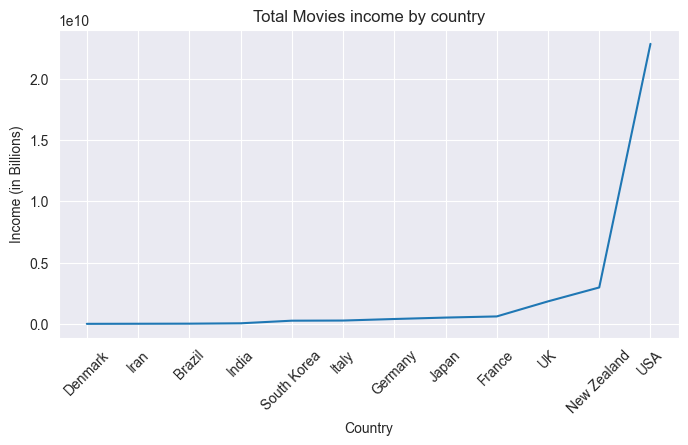

In [1467]:
new = movies.groupby("Country", as_index=False)["Income"].sum().sort_values(by="Income",ascending=True)
plt.figure(figsize=(8,4), dpi=100)
sns.lineplot(x="Country", y="Income", data=new)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Income (in Billions)")
plt.title("Total Movies income by country")
plt.show()

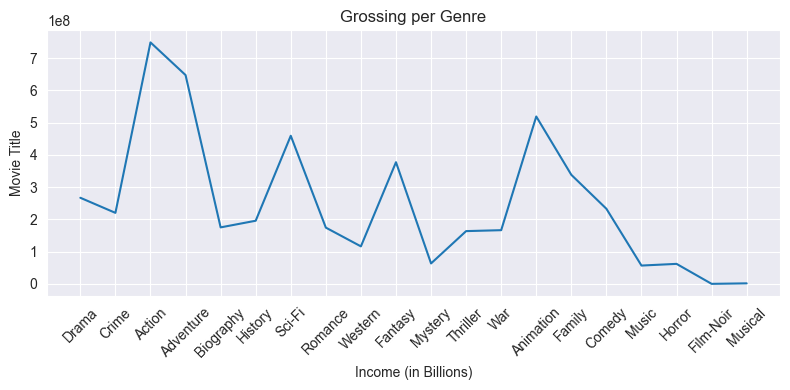

In [1468]:
#top_10_income_movies = melted_genres.sort_values(by="Income", ascending=False).iloc[:14]
plt.figure(figsize=(8,4), dpi=100)
sns.lineplot(y='Income', x='Genre', data=melted_genres, errorbar=None)
plt.title('Grossing per Genre')
plt.xlabel('Income (in Billions)')
plt.ylabel('Movie Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


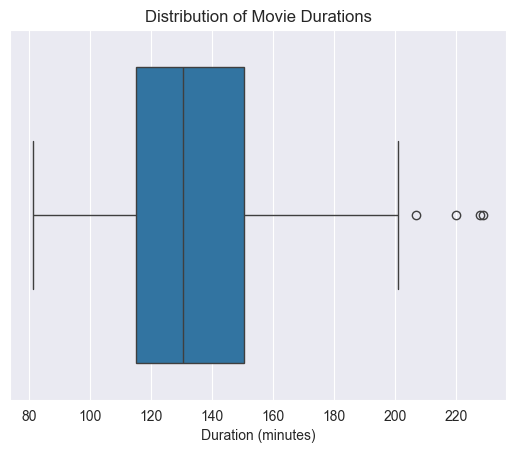

In [1469]:
sns.boxplot(x=movies['Duration'])
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

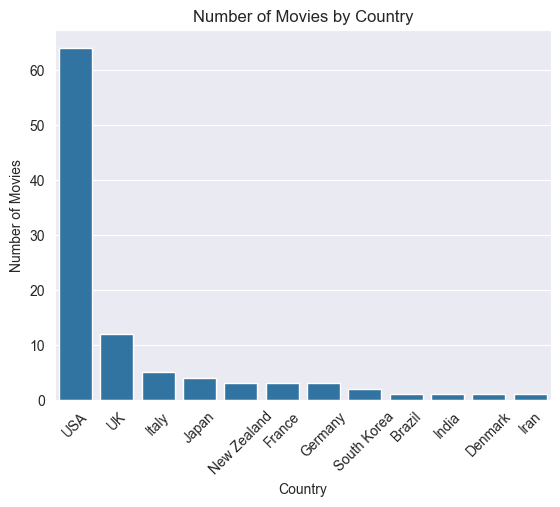

In [1470]:
country_counts = movies['Country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Number of Movies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

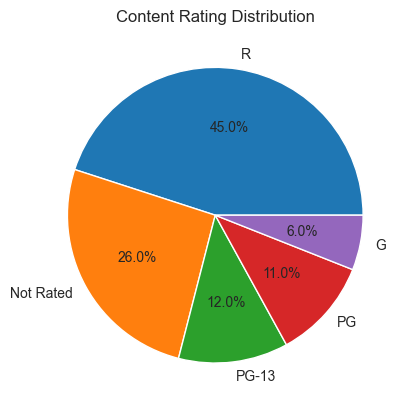

In [1471]:
content_rating_counts = movies['Content Rating'].value_counts()
plt.pie(content_rating_counts, labels=content_rating_counts.index, autopct='%1.1f%%')
plt.title('Content Rating Distribution')
plt.show()

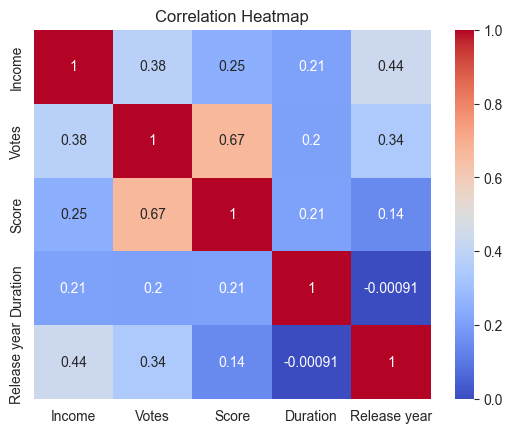

In [1472]:
corr = movies[['Income', 'Votes', 'Score', 'Duration', "Release year"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

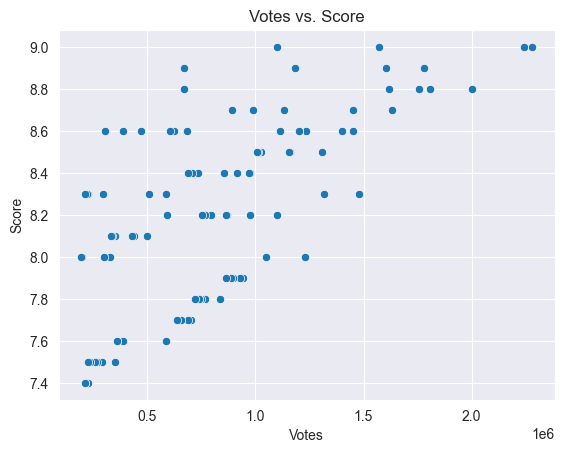

In [1473]:
sns.scatterplot(x='Votes', y='Score', data=movies)
plt.title('Votes vs. Score')
plt.xlabel('Votes')
plt.ylabel('Score')
plt.show()

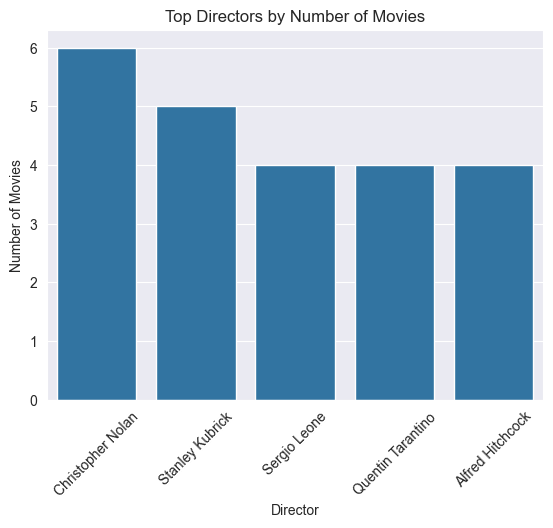

In [1474]:
top_directors = movies['Director'].value_counts().nlargest(5)
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()